# RetroPGF3 analysis using categories from the Metrics Garden 🍃  

- View the complete Impact Evaluation framework developed by LauNaMu [here](https://plaid-cement-e44.notion.site/Impact-Evaluation-Framework-1bda7c3908c54d52ac4ef364251ef651)

- See the table of categories assigned to each project [here](https://plaid-cement-e44.notion.site/7eb3a8bbe17b4246b058dbbb3819b682?v=6bd5ec67c77d4103b6b4424b6dce2979)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IEF_COL = 'IEF: Sub-category'
PROJ_COL = 'Meta: Project Name'
VAL_COL = 'Result: Received OP'

In [3]:
oso_consolidated = pd.read_csv("csv/RetroPGF3 Results - ConsolidatedData.csv", index_col=0)
mg_categories = pd.read_csv("csv/RetroPGF3 Projects - Metrics Garden Categories.csv", index_col=2)
mg_categories = mg_categories['Sub-category'].dropna().rename(IEF_COL)
df = oso_consolidated.join(mg_categories)
df.iloc[0]

Result: # Ballots                                                                            24
Result: Median OP                                                                       42500.0
Result: Quorum Reached                                                                     True
Result: Received OP                                                                     42236.2
Meta: Project Name                                                                     Grandine
Meta: Applicant Type                                                                    PROJECT
Meta: Website                                                               https://grandine.io
Meta: Bio                                     We are building consensus layer client Grandin...
Meta: Payout Address                                 0x93B9f5A8E531C3C8D5048a797F6Ead8CF78FEF36
Category: Collective Governance                                                               0
Category: Developer Ecosystem           

In [4]:
order = df.groupby(IEF_COL)[VAL_COL].mean().sort_values(ascending=False)
order

IEF: Sub-category
Ethereum Development & Maintanance               190059.086818
OP Stack development & research                  105679.940476
Dev Tooling                                       87763.308929
Governance tooling                                78986.861667
OP Stack tooling                                  73333.095833
Portfolio Tracker                                 64239.642500
Governance Research                               59821.523333
Wallets                                           51829.736154
Conferences, Events & Hackathons                  46481.859091
Discovery tooling                                 40674.485000
Dev Services & Support                            40258.512791
Optimism Governance contributions                 38343.708500
Applications (Defi, Gaming Etc), NFTs, Social     32909.370728
Developer Education                               32624.218537
Research & Analytics                              31641.078235
Optimism Governance contributions (ed

Text(0.0, 1.0, 'RetroPGF3 token distributions by impact evaluation framework sub-category\n')

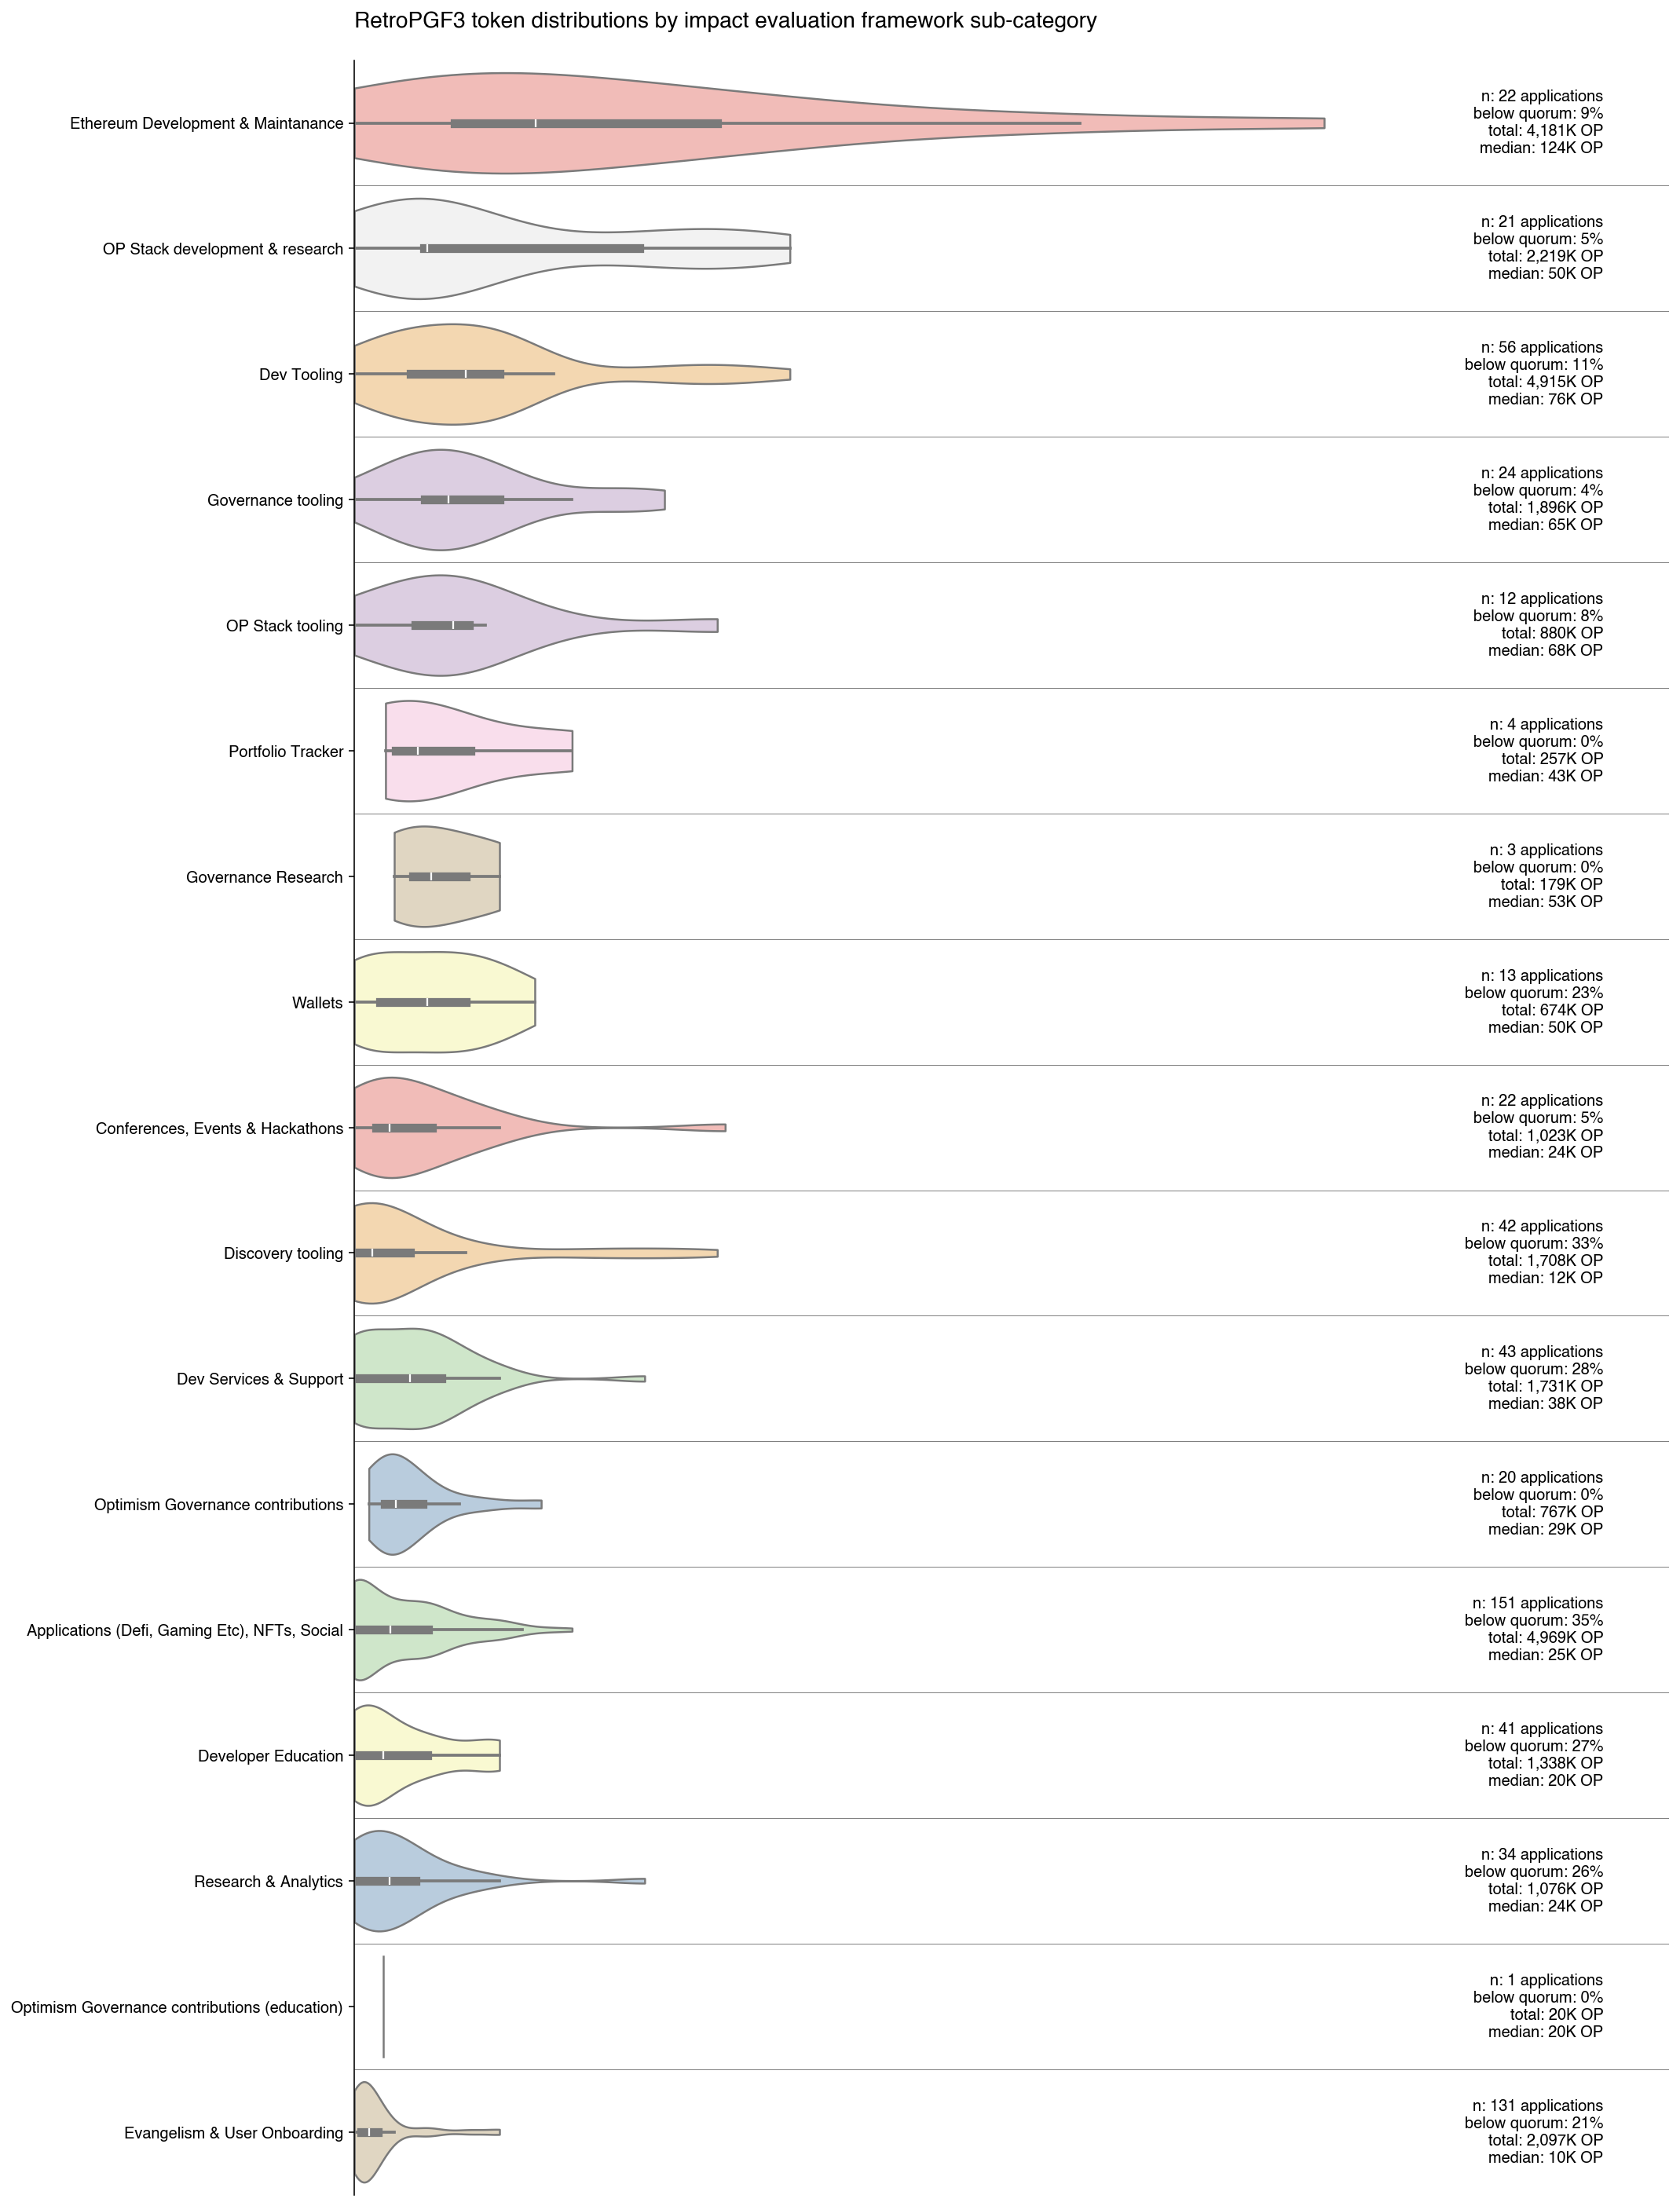

In [5]:
plt.rcParams['axes.facecolor']= 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'sans-serif']

x_max = 900_000

fig, ax = plt.subplots(figsize=(15,25), dpi=144, facecolor='white')
sns.violinplot(
    data=df,
    x=VAL_COL,
    y=IEF_COL,
    hue=IEF_COL,
    orient='h',
    order=order.index,
    cut=0,
    palette='Pastel1',
    legend=False
)
for i, (subcat, n) in enumerate(order.items()):
    vals = df[df[IEF_COL] == subcat][VAL_COL] / 1000
    n = len(vals)
    label = "\n".join([
        f"n: {n} applications",
        f"below quorum: {len(vals[vals<1])/n*100:.0f}%",
        f"total: {vals.sum():,.0f}K OP",
        f"median: {vals.median():,.0f}K OP",
    ])
    ax.text(s=label, x=x_max*.95, y=i, va='center', ha='right')
    if i > 0:
        ax.hlines(xmin=0, xmax=x_max, y=i-.5, color='gray', lw=.5)
    
ax.set_xlim(0,x_max)
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylim(len(order)-.5, -.5)
ax.set_ylabel("")
ax.set_title("RetroPGF3 token distributions by impact evaluation framework sub-category\n", loc='left', fontsize=14)